In [38]:
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models
from tensorflow import one_hot
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 2s 0us/step


In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


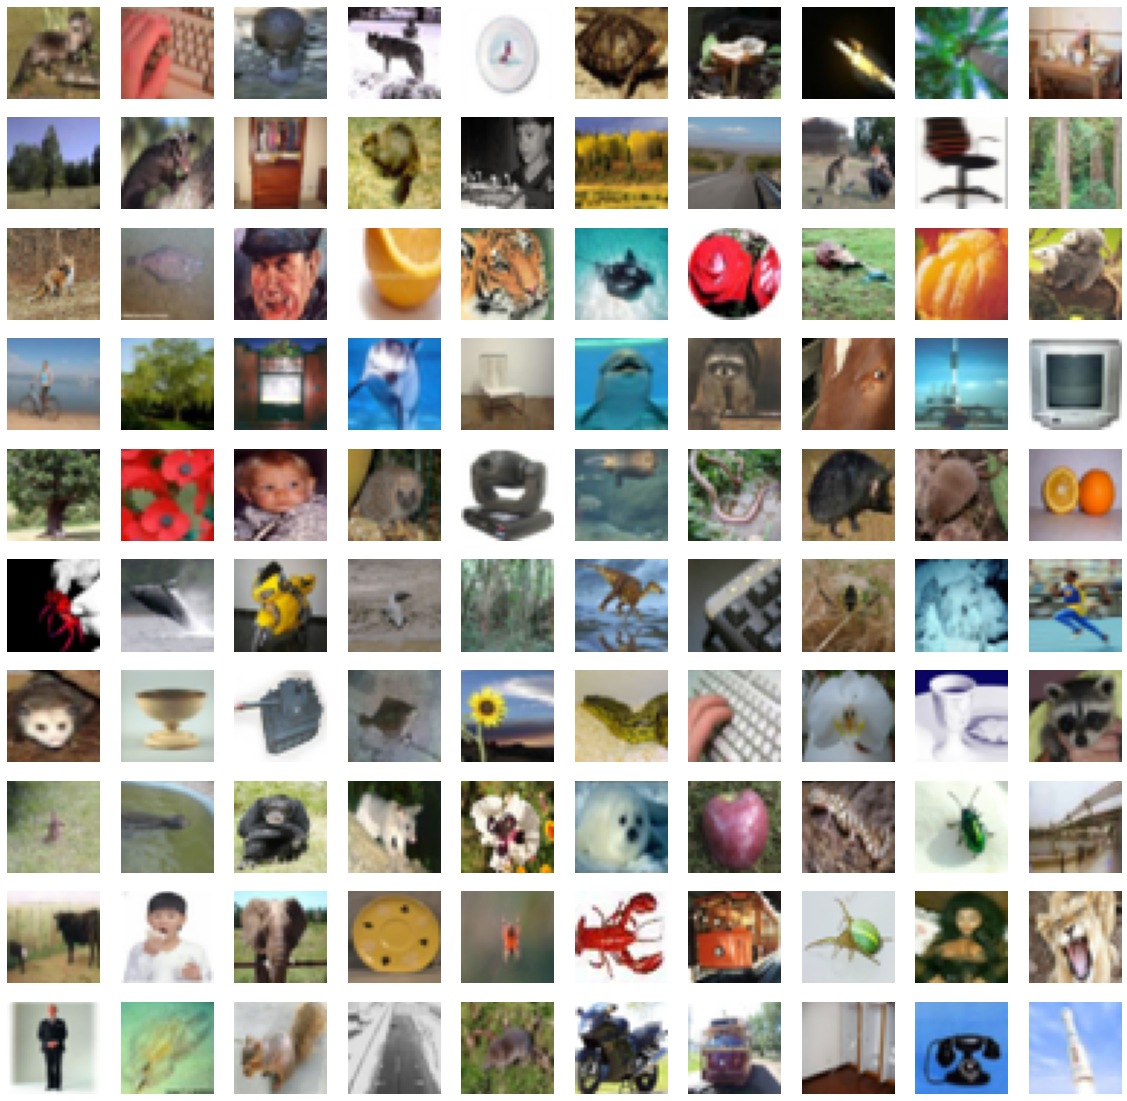

In [7]:
## Plotting the 100 image from training set

plt.figure(figsize=(20, 20))
for i, image in enumerate(X_train[100: 200]):
    plt.subplot(10, 10, i+1)
    plt.imshow(image)
    plt.xlabel(y_train[i+100])
    plt.axis('off')
plt.show()


In [10]:
## There are total 100 classes
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [31]:
## Changing the y label as one_hot encoded.

y_train = np.reshape(one_hot(y_train, depth=100), newshape=(-1, 100))
y_test = np.reshape(one_hot(y_test, depth=100), newshape=(-1, 100))

In [12]:
d## Shape of data is
shape = X_train[0].shape

print("Data shape is ", shape)


Data shape is  (32, 32, 3)


In [39]:

train_gen = ImageDataGenerator(rescale = 1.0/255.0,
                               rotation_range=45,
                               width_shift_range = 0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.3,
                               fill_mode = 'nearest',
                               )

test_gen = ImageDataGenerator(rescale = 1.0/255.0)


In [44]:
batch_size = 64
steps_per_epochs = X_train.shape[0]//batch_size
validation_step = X_test.shape[0]//batch_size

train_set = train_gen.flow(X_train, y_train,
                           batch_size=batch_size
                           )

test_set = test_gen.flow(X_test, y_test, batch_size = batch_size)


In [41]:
## Let's build our model

model = models.Sequential([
    layers.Conv2D(256, (3, 3), padding='same', activation = 'relu', input_shape=shape),
    layers.Conv2D(256, (3, 3), padding = 'same', activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (5, 5), padding='same', activation = 'relu'),
    layers.Conv2D(512, (5, 5), padding = 'same', activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), padding='same', activation = 'relu'),
    layers.Conv2D(512, (3, 3), padding = 'same', activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(1024, activation = 'relu'),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(100, activation = 'softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 256)       7168      
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 256)      0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 512)       3277312   
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 512)      

In [42]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [46]:
model.fit(train_set,
          validation_data = test_set,
          epochs = 20,
          steps_per_epoch=steps_per_epochs,
          validation_steps = validation_step
          )

Epoch 1/20
781/781 [==============================] - 91s 115ms/step - loss: 4.2806 - accuracy: 0.0540 - val_loss: 4.0087 - val_accuracy: 0.0793
Epoch 2/20
781/781 [==============================] - 89s 114ms/step - loss: 3.8119 - accuracy: 0.1050 - val_loss: 3.8528 - val_accuracy: 0.1100
Epoch 3/20
781/781 [==============================] - 90s 115ms/step - loss: 3.5974 - accuracy: 0.1412 - val_loss: 3.4389 - val_accuracy: 0.1704
Epoch 4/20
781/781 [==============================] - 90s 115ms/step - loss: 3.4117 - accuracy: 0.1721 - val_loss: 3.3153 - val_accuracy: 0.2051
Epoch 5/20
781/781 [==============================] - 90s 115ms/step - loss: 3.2649 - accuracy: 0.2003 - val_loss: 3.4490 - val_accuracy: 0.1884
Epoch 6/20
781/781 [==============================] - 89s 114ms/step - loss: 3.1266 - accuracy: 0.2233 - val_loss: 3.0173 - val_accuracy: 0.2535
Epoch 7/20
781/781 [==============================] - 89s 114ms/step - loss: 2.9977 - accuracy: 0.2500 - val_loss: 2.8810 - val_ac